## Libraries

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)

## Data

In [ ]:
path = '/content/drive/MyDrive/Colab/Projects/Semana12_Recomendacao/data/clean_df_amazon.csv'
df = pd.read_csv(path, index_col=0)

## Code

In [ ]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Genre_bin,tokens
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,"['10-day', 'green', 'smoothie', 'cleanse']"
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,"['11/22/63', 'novel']"
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,"['12', 'rules', 'life', 'antidote', 'chaos']"
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,"['1984', 'signet', 'classics']"
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,"['5,000', 'awesome', 'facts', 'everything', 'n..."
...,...,...,...,...,...,...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,1,"['winter', 'world', 'book', 'two', 'century', ..."
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,0,"['women', 'food', 'god', 'unexpected', 'path',..."
348,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,1,['wonder']
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,1,"['wrecking', 'ball', 'diary', 'wimpy', 'kid', ..."


In [ ]:
features = df[['User Rating', 'Reviews', 'Price', 'Year', 'Genre_bin']]

In [ ]:
std = StandardScaler()

In [ ]:
features_std = std.fit_transform(features)
features_std_df = pd.DataFrame(features_std, columns=features.columns)

In [ ]:
features_std_df

,User Rating,Reviews,Price,Year,Genre_bin
0,0.401432,0.696499,-0.499274,0.558815,-0.915258
1,-0.040269,-0.712260,0.900288,-0.924876,1.092589
2,0.401432,0.846510,0.200507,1.152291,-0.915258
3,0.401432,1.071665,-0.699211,0.855553,1.092589
4,0.843132,-0.195372,-0.099399,1.449029,-0.915258
...,...,...,...,...,...
346,-0.481970,0.089640,0.200507,-0.628138,1.092589
347,-1.807071,-0.781326,-0.199368,-1.221614,-0.915258
348,0.843132,1.090174,-0.399305,0.855553,1.092589
349,1.284833,-0.034402,-0.499274,1.449029,1.092589


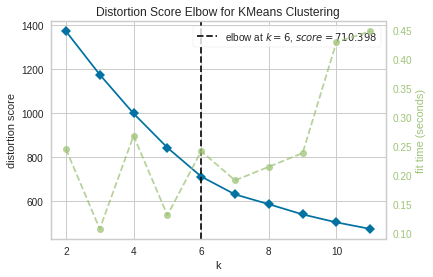

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(features_std_df) 
visualizer.show()

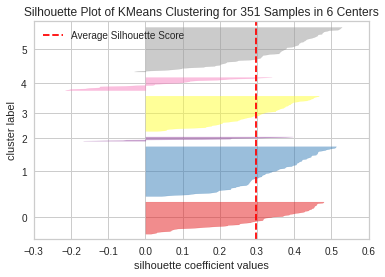

In [ ]:
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(features_std_df) 
visualizer.show()

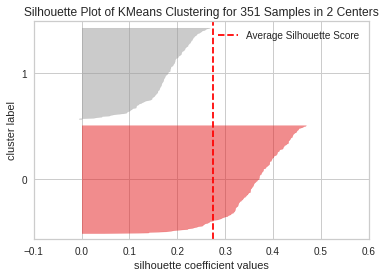

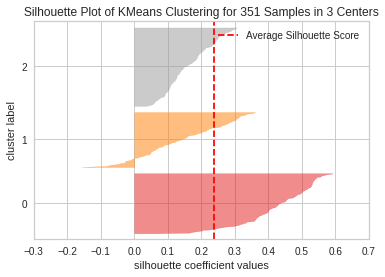

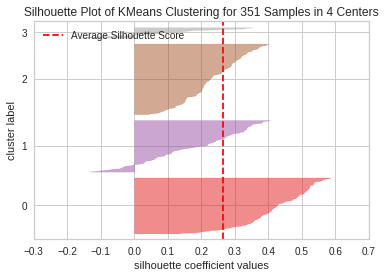

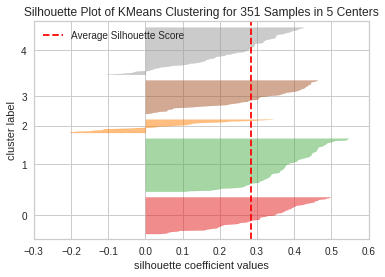

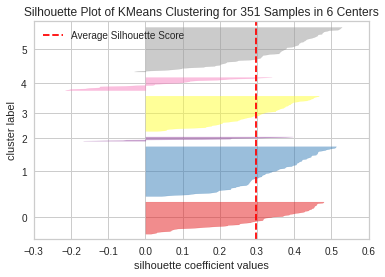

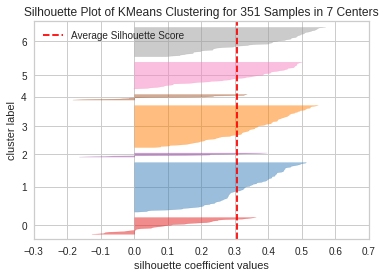

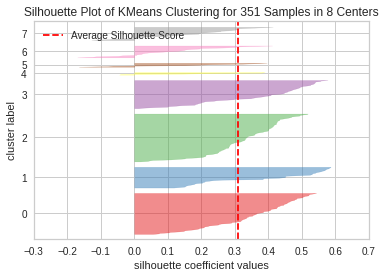

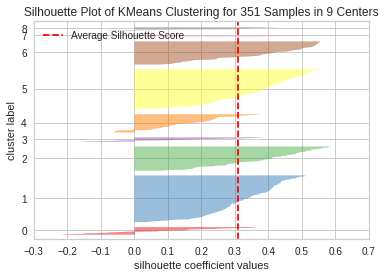

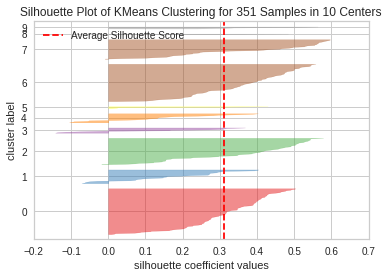

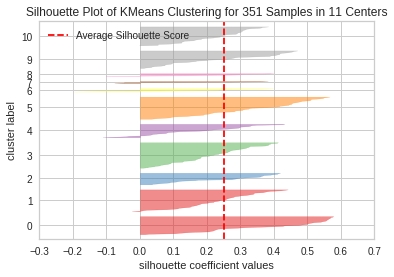

In [ ]:
for i in range(2,12):
  model = KMeans(n_clusters=i, random_state=42)
  yellow_visualizer = SilhouetteVisualizer(model)
  yellow_visualizer.fit(features_std_df)
  yellow_visualizer.show()


In [ ]:
df.corr()

,User Rating,Reviews,Price,Year,Genre_bin
User Rating,1.000000,-0.056105,-0.025012,0.237591,0.026311
Reviews,-0.056105,1.000000,-0.040079,0.317818,0.280202
Price,-0.025012,-0.040079,1.000000,-0.128949,-0.078967
Year,0.237591,0.317818,-0.128949,1.000000,-0.072463
Genre_bin,0.026311,0.280202,-0.078967,-0.072463,1.000000


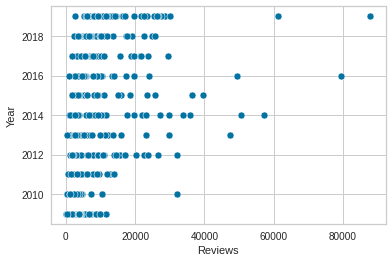

In [ ]:
sns.scatterplot(data=df, x='Reviews', y='Year')

In [ ]:
df[df['Reviews']==87841]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Genre_bin,tokens
342,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,1,"['crawdads', 'sing']"


In [ ]:
model = KMeans(6)
cluster = model.fit_predict(features_std_df)

In [ ]:
cluster

array([4, 3, 4, 2, 4, 3, 2, 2, 4, 2, 1, 1, 2, 1, 4, 4, 1, 4, 4, 5, 3, 4,
       3, 1, 4, 1, 4, 4, 1, 1, 5, 4, 4, 4, 3, 1, 2, 3, 4, 4, 1, 3, 4, 1,
       2, 4, 4, 3, 1, 1, 3, 3, 3, 2, 1, 1, 0, 2, 3, 2, 4, 5, 3, 1, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 3, 3, 4, 4, 2, 2, 4, 3, 3, 5,
       3, 4, 4, 1, 2, 1, 3, 1, 1, 2, 4, 4, 1, 5, 3, 1, 5, 4, 1, 2, 2, 1,
       5, 4, 0, 1, 2, 5, 2, 2, 2, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 3,
       2, 3, 1, 5, 3, 4, 4, 4, 3, 3, 4, 1, 1, 1, 4, 4, 4, 4, 4, 2, 4, 1,
       4, 4, 1, 1, 3, 2, 5, 3, 1, 2, 4, 1, 4, 1, 4, 4, 4, 5, 4, 4, 3, 4,
       1, 4, 2, 2, 3, 1, 4, 5, 2, 1, 4, 3, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2,
       4, 3, 4, 4, 1, 4, 1, 3, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 4, 1, 4,
       5, 1, 3, 1, 2, 1, 4, 0, 2, 2, 4, 3, 1, 4, 3, 4, 1, 2, 1, 3, 5, 1,
       1, 4, 2, 5, 3, 3, 3, 3, 2, 5, 3, 2, 3, 5, 3, 2, 3, 2, 5, 5, 3, 1,
       4, 1, 3, 2, 1, 4, 3, 3, 3, 1, 4, 3, 5, 3, 2, 4, 5, 0, 1, 3, 1, 4,
       1, 4, 4, 2, 1, 2, 3, 3, 1, 3, 2, 3, 5, 3, 4,

In [ ]:
df['cluster'] = cluster

In [ ]:
df.groupby(by='cluster').median()

,User Rating,Reviews,Price,Year,Genre_bin
cluster,,,,,
0,4.7,4848.0,52.5,2014.0,0.0
1,4.6,2814.0,14.0,2011.0,0.0
2,4.8,8882.0,8.0,2017.0,1.0
3,4.6,5951.0,11.0,2011.0,1.0
4,4.7,7508.0,10.0,2017.0,0.0
5,4.5,32122.0,13.5,2015.0,1.0


In [ ]:
df.groupby(by='cluster').mean()

,User Rating,Reviews,Price,Year,Genre_bin
cluster,,,,,
0,4.662500,5535.750000,59.250000,2013.125000,0.375000
1,4.534091,3862.295455,14.363636,2011.250000,0.000000
2,4.775000,11148.625000,10.140625,2016.828125,1.000000
3,4.540000,7272.857143,11.385714,2010.914286,1.000000
4,4.664948,9413.587629,10.793814,2017.103093,0.000000
5,4.400000,38132.958333,13.750000,2015.000000,0.958333


In [ ]:
df.groupby(by='Genre').describe().T

Genre                   Fiction   Non Fiction
User Rating count    160.000000    191.000000
            mean       4.615625      4.603665
            std        0.274388      0.177815
            min        3.300000      4.000000
            25%        4.500000      4.500000
            50%        4.700000      4.600000
            75%        4.800000      4.700000
            max        4.900000      4.900000
Reviews     count    160.000000    191.000000
            mean   13111.068750   7001.664921
            std    13312.234067   7241.591553
            min      548.000000     37.000000
            25%     4846.000000   2516.000000
            50%     8839.500000   4896.000000
            75%    17916.250000   9243.500000
            max    87841.000000  61133.000000
Price       count    160.000000    191.000000
            mean      12.131250     13.717277
            std        9.539802     10.370183
            min        0.000000      0.000000
            25%        7.000000      8.000000
            50%       10.500000     12.000000
            75%       14.000000     17.000000
            max       82.000000    105.000000
Year        count    160.000000    191.000000
            mean    2013.850000   2014.340314
            std        3.359395      3.380190
            min     2009.000000   2009.000000
            25%     2011.000000   2011.000000
            50%     2014.000000   2015.000000
            75%     2017.000000   2017.000000
            max     2019.000000   2019.000000
Genre_bin   count    160.000000    191.000000
            mean       1.000000      0.000000
            std        0.000000      0.000000
            min        1.000000      0.000000
            25%        1.000000      0.000000
            50%        1.000000      0.000000
            75%        1.000000      0.000000
            max        1.000000      0.000000
cluster     count    160.000000    191.000000
            mean       2.831250      2.518325
            std        1.059381      1.545257
            min        0.000000      0.000000
            25%        2.000000      1.000000
            50%        3.000000      4.000000
            75%        3.000000      4.000000
            max        5.000000      5.000000

#### describe() por coluna

In [ ]:
df.groupby(by='cluster')['Reviews'].describe().T

cluster,0,1,2,3,4,5
count,86.000000,63.000000,98.000000,9.000000,26.000000,69.000000
mean,3908.418605,11214.761905,9347.642857,5010.333333,36469.000000,7001.144928
std,3604.954621,6964.880208,6775.502874,4185.132405,18605.191632,4942.586818
min,37.000000,1873.000000,1831.000000,807.000000,9372.000000,548.000000
25%,1425.000000,5867.000000,4416.250000,1201.000000,25644.500000,3523.000000
50%,2814.000000,8922.000000,7452.000000,3829.000000,30886.500000,5680.000000
75%,4871.750000,16816.500000,11124.250000,6679.000000,45313.500000,9967.000000
max,17044.000000,30183.000000,29673.000000,13471.000000,87841.000000,22614.000000


In [ ]:
df.groupby(by='cluster')['Price'].describe().T

cluster,0,1,2,3,4,5
count,86.000000,63.000000,98.000000,9.000000,26.000000,69.000000
mean,14.209302,10.079365,10.744898,56.666667,13.423077,11.478261
std,6.109041,7.133071,5.215582,22.511108,6.312990,6.206279
min,1.000000,0.000000,0.000000,36.000000,7.000000,0.000000
25%,10.000000,5.000000,6.000000,42.000000,9.500000,7.000000
50%,14.000000,8.000000,10.000000,52.000000,13.000000,11.000000
75%,18.000000,12.500000,15.000000,54.000000,14.000000,14.000000
max,32.000000,30.000000,23.000000,105.000000,39.000000,32.000000


In [ ]:
df.groupby(by='cluster')['User Rating'].describe().T

cluster,0,1,2,3,4,5
count,86.000000,63.000000,98.000000,9.000000,26.000000,69.000000
mean,4.538372,4.774603,4.662245,4.622222,4.357692,4.563768
std,0.182253,0.142521,0.150268,0.204803,0.399172,0.216232
min,4.000000,4.300000,4.200000,4.300000,3.300000,3.900000
25%,4.400000,4.700000,4.600000,4.500000,4.100000,4.400000
50%,4.600000,4.800000,4.700000,4.700000,4.500000,4.600000
75%,4.700000,4.900000,4.800000,4.800000,4.700000,4.700000
max,4.800000,4.900000,4.900000,4.900000,4.800000,4.800000


In [ ]:
df.groupby(by='cluster')['Genre_bin'].describe().T

cluster,0,1,2,3,4,5
count,86.0,63.0,98.0,9.000000,26.000000,69.0
mean,0.0,1.0,0.0,0.333333,0.961538,1.0
std,0.0,0.0,0.0,0.500000,0.196116,0.0
min,0.0,1.0,0.0,0.000000,0.000000,1.0
25%,0.0,1.0,0.0,0.000000,1.000000,1.0
50%,0.0,1.0,0.0,0.000000,1.000000,1.0
75%,0.0,1.0,0.0,1.000000,1.000000,1.0
max,0.0,1.0,0.0,1.000000,1.000000,1.0


#### describe() por cluster

In [ ]:
df[df['cluster']==0].describe()

,User Rating,Reviews,Price,Year,Genre_bin,cluster
count,86.000000,86.000000,86.000000,86.000000,86.0,86.0
mean,4.538372,3908.418605,14.209302,2011.151163,0.0,0.0
std,0.182253,3604.954621,6.109041,1.662864,0.0,0.0
min,4.000000,37.000000,1.000000,2009.000000,0.0,0.0
25%,4.400000,1425.000000,10.000000,2010.000000,0.0,0.0
50%,4.600000,2814.000000,14.000000,2011.000000,0.0,0.0
75%,4.700000,4871.750000,18.000000,2012.000000,0.0,0.0
max,4.800000,17044.000000,32.000000,2017.000000,0.0,0.0


In [ ]:
df[df['cluster']==1].describe()

,User Rating,Reviews,Price,Year,Genre_bin,cluster
count,63.000000,63.000000,63.000000,63.000000,63.0,63.0
mean,4.774603,11214.761905,10.079365,2016.888889,1.0,1.0
std,0.142521,6964.880208,7.133071,1.984709,0.0,0.0
min,4.300000,1873.000000,0.000000,2013.000000,1.0,1.0
25%,4.700000,5867.000000,5.000000,2015.000000,1.0,1.0
50%,4.800000,8922.000000,8.000000,2017.000000,1.0,1.0
75%,4.900000,16816.500000,12.500000,2019.000000,1.0,1.0
max,4.900000,30183.000000,30.000000,2019.000000,1.0,1.0


In [ ]:
df[df['cluster']==2].describe()

,User Rating,Reviews,Price,Year,Genre_bin,cluster
count,98.000000,98.000000,98.000000,98.000000,98.0,98.0
mean,4.662245,9347.642857,10.744898,2017.081633,0.0,2.0
std,0.150268,6775.502874,5.215582,1.622480,0.0,0.0
min,4.200000,1831.000000,0.000000,2014.000000,0.0,2.0
25%,4.600000,4416.250000,6.000000,2016.000000,0.0,2.0
50%,4.700000,7452.000000,10.000000,2017.000000,0.0,2.0
75%,4.800000,11124.250000,15.000000,2019.000000,0.0,2.0
max,4.900000,29673.000000,23.000000,2019.000000,0.0,2.0


## Resultado

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab/Projects/Semana12_Recomendacao/data/cluster_df_amazon.csv')

## Visualizacao

In [ ]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Genre_bin,tokens,cluster
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,"['10-day', 'green', 'smoothie', 'cleanse']",4
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,"['11/22/63', 'novel']",3
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,"['12', 'rules', 'life', 'antidote', 'chaos']",4
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,"['1984', 'signet', 'classics']",2
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,"['5,000', 'awesome', 'facts', 'everything', 'n...",4
...,...,...,...,...,...,...,...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,1,"['winter', 'world', 'book', 'two', 'century', ...",3
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,0,"['women', 'food', 'god', 'unexpected', 'path',...",1
348,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,1,['wonder'],2
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,1,"['wrecking', 'ball', 'diary', 'wimpy', 'kid', ...",2


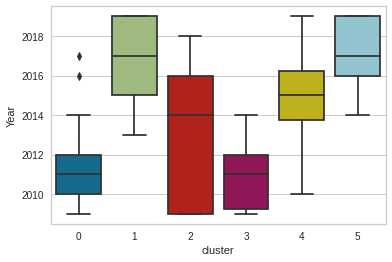

In [ ]:
sns.boxplot(data=df, x='cluster', y='Year')
plt.show()

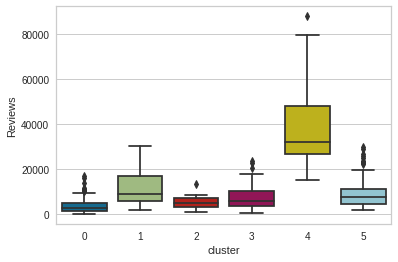

In [ ]:
sns.boxplot(data=df, x='cluster', y='Reviews')
plt.show()

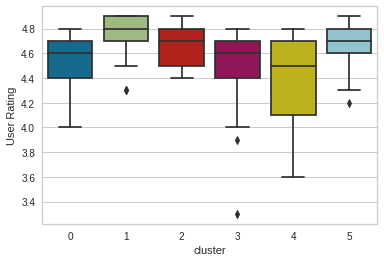

In [ ]:
sns.boxplot(data=df, x='cluster', y='User Rating')
plt.show()

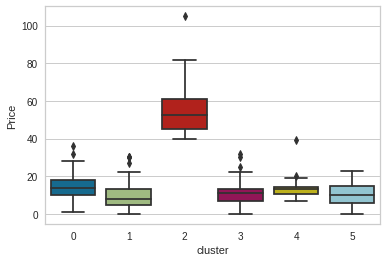

In [ ]:
sns.boxplot(data=df, x='cluster', y='Price')
plt.show()

Grupos:

cluster | Genre | Price | User Rating | Reviews mean() | Year
-----|-----|-----|-----|-----|-----
0 | Não Ficção | Preço baixo | 4.0 ~ 4.8 | 3.908 | 09 ~ 17
1 | Ficção | Preço baixo | 4.3 ~ 4.9 | 11.214 | 13 ~ 19
2 | Não Ficção | Preço baixo | 4.2 ~ 4.9 | 9.347 | 14 ~ 19
3 | ~ | Preço ALTO | 4.3 ~ 4.9 | 5.010 | 09 ~ 18
4 | ~ | Preço baixo | 3.3 ~ 4.8 | 36.469 | 10 ~ 19
5 | Ficção | Preço baixo | 3.9 ~ 4.8 | 7.001 | 09 ~ 14

## Sistema de Recomendacao

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Genre_bin,tokens,cluster
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,"['10-day', 'green', 'smoothie', 'cleanse']",4
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,"['11/22/63', 'novel']",3
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,"['12', 'rules', 'life', 'antidote', 'chaos']",4
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,"['1984', 'signet', 'classics']",2
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,"['5,000', 'awesome', 'facts', 'everything', 'n...",4
...,...,...,...,...,...,...,...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,1,"['winter', 'world', 'book', 'two', 'century', ...",3
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,0,"['women', 'food', 'god', 'unexpected', 'path',...",1
348,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,1,['wonder'],2
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,1,"['wrecking', 'ball', 'diary', 'wimpy', 'kid', ...",2


In [ ]:
cluster

array([4, 3, 4, 2, 4, 3, 2, 2, 4, 2, 1, 1, 2, 1, 4, 4, 1, 4, 4, 5, 3, 4,
       3, 1, 4, 1, 4, 4, 1, 1, 5, 4, 4, 4, 3, 1, 2, 3, 4, 4, 1, 3, 4, 1,
       2, 4, 4, 3, 1, 1, 3, 3, 3, 2, 1, 1, 0, 2, 3, 2, 4, 5, 3, 1, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 3, 3, 4, 4, 2, 2, 4, 3, 3, 5,
       3, 4, 4, 1, 2, 1, 3, 1, 1, 2, 4, 4, 1, 5, 3, 1, 5, 4, 1, 2, 2, 1,
       5, 4, 0, 1, 2, 5, 2, 2, 2, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 3,
       2, 3, 1, 5, 3, 4, 4, 4, 3, 3, 4, 1, 1, 1, 4, 4, 4, 4, 4, 2, 4, 1,
       4, 4, 1, 1, 3, 2, 5, 3, 1, 2, 4, 1, 4, 1, 4, 4, 4, 5, 4, 4, 3, 4,
       1, 4, 2, 2, 3, 1, 4, 5, 2, 1, 4, 3, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2,
       4, 3, 4, 4, 1, 4, 1, 3, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 4, 1, 4,
       5, 1, 3, 1, 2, 1, 4, 0, 2, 2, 4, 3, 1, 4, 3, 4, 1, 2, 1, 3, 5, 1,
       1, 4, 2, 5, 3, 3, 3, 3, 2, 5, 3, 2, 3, 5, 3, 2, 3, 2, 5, 5, 3, 1,
       4, 1, 3, 2, 1, 4, 3, 3, 3, 1, 4, 3, 5, 3, 2, 4, 5, 0, 1, 3, 1, 4,
       1, 4, 4, 2, 1, 2, 3, 3, 1, 3, 2, 3, 5, 3, 4,

In [ ]:
features_std_df['cluster'] = cluster

In [ ]:
features_std_df

,User Rating,Reviews,Price,Year,Genre_bin,cluster
0,0.401432,0.696499,-0.499274,0.558815,-0.915258,4
1,-0.040269,-0.712260,0.900288,-0.924876,1.092589,3
2,0.401432,0.846510,0.200507,1.152291,-0.915258,4
3,0.401432,1.071665,-0.699211,0.855553,1.092589,2
4,0.843132,-0.195372,-0.099399,1.449029,-0.915258,4
...,...,...,...,...,...,...
346,-0.481970,0.089640,0.200507,-0.628138,1.092589,3
347,-1.807071,-0.781326,-0.199368,-1.221614,-0.915258,1
348,0.843132,1.090174,-0.399305,0.855553,1.092589,2
349,1.284833,-0.034402,-0.499274,1.449029,1.092589,2


In [ ]:
model = NearestNeighbors(n_neighbors=5)

In [ ]:
model.fit(features_std_df)

NearestNeighbors()

In [ ]:
distancias, indices = model.kneighbors(features_std_df)

In [ ]:
indices

array([[  0,  21, 168,  90, 166],
       [  1, 136, 205,  79, 324],
       [  2,  39,  99, 125, 168],
       ...,
       [348,   3, 178, 322,   7],
       [349,  70, 208, 312,  69],
       [350, 306, 168, 186, 309]])

In [ ]:
distancias

array([[0.        , 0.55719257, 0.59455648, 0.71562574, 0.78207781],
       [0.        , 0.35969628, 0.80444405, 0.89906853, 0.93749326],
       [0.        , 0.6607043 , 0.68260533, 0.68368753, 0.7090362 ],
       ...,
       [0.        , 0.53421503, 0.74677827, 0.75652646, 0.76572255],
       [0.        , 0.02983645, 0.19995776, 0.20673616, 0.29523352],
       [0.        , 0.32490033, 0.43190985, 0.4409985 , 0.52751558]])

In [ ]:
book_index = df[df['Name']=='Wonder'].index[0]

In [ ]:
indices[book_index]

array([348,   3, 178, 322,   7])

In [ ]:
distancias[book_index]

array([0.        , 0.53421503, 0.74677827, 0.75652646, 0.76572255])

In [ ]:
index_dist = list(zip(indices[book_index], distancias[book_index]))

In [ ]:
index_dist

[(348, 0.0),
 (3, 0.5342150267432255),
 (178, 0.746778267288021),
 (322, 0.7565264552692413),
 (7, 0.7657225468254725)]

In [ ]:
teste = list(index_dist)

In [ ]:
teste

[]

In [ ]:
for x, y in index_dist:
  print(f"""
          Distance: {round(y, 2)}
          Titulo: {df.iloc[x]['Name']}
          Author:{df.iloc[x]['Author']}
          Rating: {df.iloc[x]['User Rating']}
          Reviews: {df.iloc[x]['Reviews']}
          Price: {df.iloc[x]['Price']}
          Year: {df.iloc[x]['Year']}
          Genre: {df.iloc[x]['Genre']}
        """)
          



          Distance: 0.0
          Titulo: Wonder
          Author:R. J. Palacio
          Rating: 4.8
          Reviews: 21625
          Price: 9
          Year: 2017
          Genre: Fiction
        

          Distance: 0.53
          Titulo: 1984 (Signet Classics)
          Author:George Orwell
          Rating: 4.7
          Reviews: 21424
          Price: 6
          Year: 2017
          Genre: Fiction
        

          Distance: 0.75
          Titulo: Oh, the Places You'll Go!
          Author:Dr. Seuss
          Rating: 4.9
          Reviews: 21834
          Price: 8
          Year: 2019
          Genre: Fiction
        

          Distance: 0.76
          Titulo: To Kill a Mockingbird
          Author:Harper Lee
          Rating: 4.8
          Reviews: 26234
          Price: 7
          Year: 2019
          Genre: Fiction
        

          Distance: 0.77
          Titulo: A Gentleman in Moscow: A Novel
          Author:Amor Towles
          Rating: 4.7
          Reviews: 1

In [ ]:
def recomended(book):

  try:
    book_index = df[df['Name']==book].index[0]
    index_dist = list(zip(indices[book_index], distancias[book_index]))

    for x, y in index_dist[1:]:
      print(f"""
              Distance: {round(y, 2)}
              Titulo: {df.iloc[x]['Name']}
              Author:{df.iloc[x]['Author']}
              Rating: {df.iloc[x]['User Rating']}
              Reviews: {df.iloc[x]['Reviews']}
              Price: {df.iloc[x]['Price']}
              Year: {df.iloc[x]['Year']}
              Genre: {df.iloc[x]['Genre']}
            """)
  except:
    print('Hmm.. Não tenho esse livro.')

In [ ]:
recomended('Wonder')


            Distance: 0.53
            Titulo: 1984 (Signet Classics)
            Author:George Orwell
            Rating: 4.7
            Reviews: 21424
            Price: 6
            Year: 2017
            Genre: Fiction
          

            Distance: 0.75
            Titulo: Oh, the Places You'll Go!
            Author:Dr. Seuss
            Rating: 4.9
            Reviews: 21834
            Price: 8
            Year: 2019
            Genre: Fiction
          

            Distance: 0.76
            Titulo: To Kill a Mockingbird
            Author:Harper Lee
            Rating: 4.8
            Reviews: 26234
            Price: 7
            Year: 2019
            Genre: Fiction
          

            Distance: 0.77
            Titulo: A Gentleman in Moscow: A Novel
            Author:Amor Towles
            Rating: 4.7
            Reviews: 19699
            Price: 15
            Year: 2017
            Genre: Fiction
          


In [ ]:
recomended('To Kill a Mockingbird')


            Distance: 0.47
            Titulo: The Wonky Donkey
            Author:Craig Smith
            Rating: 4.8
            Reviews: 30183
            Price: 4
            Year: 2019
            Genre: Fiction
          

            Distance: 0.61
            Titulo: Oh, the Places You'll Go!
            Author:Dr. Seuss
            Rating: 4.9
            Reviews: 21834
            Price: 8
            Year: 2019
            Genre: Fiction
          

            Distance: 0.76
            Titulo: Wonder
            Author:R. J. Palacio
            Rating: 4.8
            Reviews: 21625
            Price: 9
            Year: 2017
            Genre: Fiction
          

            Distance: 0.78
            Titulo: The Very Hungry Caterpillar
            Author:Eric Carle
            Rating: 4.9
            Reviews: 19546
            Price: 5
            Year: 2019
            Genre: Fiction
          


In [ ]:
recomended('Crepusculo')

Hmm.. Não tenho esse livro.


In [ ]:
df[df['Reviews']==87841]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Genre_bin,tokens,cluster
342,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,1,"['crawdads', 'sing']",5


In [ ]:
recomended('Where the Crawdads Sing')


              Distance: 3.2
              Titulo: Becoming
              Author:Michelle Obama
              Rating: 4.8
              Reviews: 61133
              Price: 11
              Year: 2019
              Genre: Non Fiction
            

              Distance: 3.4
              Titulo: The Girl on the Train
              Author:Paula Hawkins
              Rating: 4.1
              Reviews: 79446
              Price: 7
              Year: 2016
              Genre: Fiction
            

              Distance: 3.68
              Titulo: The Nightingale: A Novel
              Author:Kristin Hannah
              Rating: 4.8
              Reviews: 49288
              Price: 11
              Year: 2016
              Genre: Fiction
            

              Distance: 3.78
              Titulo: The Fault in Our Stars
              Author:John Green
              Rating: 4.7
              Reviews: 50482
              Price: 13
              Year: 2014
              Genre: Fiction
  